In [1]:
from Phosphorpy import DataSet
import numpy as np

In [2]:
ds = DataSet.load_coordinates('/Users/patrickr/Documents/temp/comb_ra_lte_180.fits', 'fits','ra', 'dec')
ds.load_from_vizier(['SDSS', '2MASS'])

# Flux
Phosphorpy provides a system to convert magnitudes to fluxes. Based on the flux zero points from [SVO](http://svo2.cab.inta-csic.es/svo/theory/fps3/index.php) the magnitudes are converted with respect to the used magnitude system (Vega or AB). To extract the necessary values the package **armapy** is used, which provides the opportunity to download filter bandpasses and the general filter information from [SVO](http://svo2.cab.inta-csic.es/svo/theory/fps3/index.php).<br>
To get the fluxes of all filters use:

In [3]:
fluxes = ds.flux.data

and the fluxes parameter will contain a pandas DataFrame with the fluxes of the targets in the same order as coordinates or magnitudes. The labeling of the columns will be the same as for the magnitudes.

### Plotting
The flux environment also provides a basic plotting system. In this case one can plot the SED.<br>
For example, if the first SED of the data set should be plotted in a log-log environment

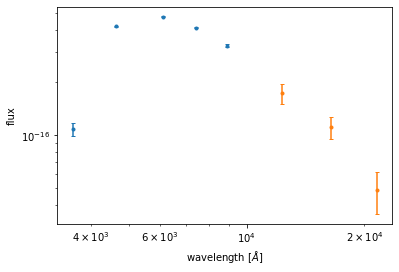

In [4]:
ds.flux.plot.sed(1, x_log=True, y_log=True)


As in all plotting functions there is the option to give a path string to store the resulting graph directly on ones machine.

### Fitting
The flux environment provides a system to fit the SED's. The fitting system has the advantage that it checks automatically if data are missing and fit's only the non NaN values.<br>
At the moment it has two possibilities to fit the SED. The first one is a fit by a polynomial

In [5]:
ds.flux.fit_polynomial(4, error_weighted=True, 
                       x_log=True, y_log=True, 
                       lower_limit=3500, upper_limit=20000)

,a,b,c,d,e
1,-46.623054,733.619297,-4328.883092,11351.961849,-11177.727124
2,-41.370800,651.196488,-3843.728544,10082.202070,-9930.335327
3,-41.717332,658.645777,-3900.593758,10268.576531,-10154.307088
4,-31.537566,501.435547,-2990.777005,7929.834929,-7900.377867
5,-37.536985,591.408458,-3494.057726,9173.216647,-9044.204596
...,...,...,...,...,...
13557,-36.199599,570.667527,-3374.208532,8867.666862,-8754.640144
13558,-35.324727,558.530888,-3312.204648,8730.078710,-8643.785576
13559,-30.393473,484.873625,-2901.170994,7714.933610,-7707.423603
13560,-38.916592,611.689858,-3605.424703,9444.016989,-9290.117830


'4' is the degree of the polynomial, 'error_weighted' means that the inverse error is used as a weight for the fit. 'x_log' and 'y_log' have the same meaning as in the plotting case, and 'upper_limit' and 'lower_limit' are limits for the wavelength coverage. If no [astropy unit](http://docs.astropy.org/en/stable/units/) is given then they are taken as angstrom like in the case above.

The second option to fit the SED is more general. Instead of the usage of already implemented functions, the fitting function is given as a parameter. The style of the function is the same as the function [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) of the scipy package requires.

In [6]:
def fit_function(wavelength, *parameters):
    y = np.zeros(len(wavelength))
    for p in parameters:
        y += wavelength*p
    return y

zero_points = [0, 0, 0, 0]
ds.flux.func_fit(fit_function, 
                 error_weighted=True, 
                      x_log=True, y_log=True, 
                      lower_limit=3500, upper_limit=20000,
                      p0=zero_points)

,a,b,c,d
1,-0.732213,-0.732213,-0.732213,-1.946794
2,-1.586122,-1.586122,-0.703275,-0.182668
3,-0.525108,-0.884023,-2.737084,0.022580
4,-1.326313,-1.326313,-0.645434,-0.649124
5,-1.936848,-1.936848,0.515907,-0.710470
...,...,...,...,...
13557,-2.069036,-2.069036,-0.288950,0.333608
13558,-0.292970,-0.292970,-0.506712,-3.063576
13559,-0.177273,-0.177273,-1.822169,-1.774176
13560,-1.323851,-1.323851,-0.439786,-0.892992


Note, that **func_fit** needs a function to fit with an explicit declaration of parameters or a list with zero-points. Otherwise **Phosphorpy** can not determine the number of parameters and will raise an error.

If the latest results are needed later again, they are can be accessed with

In [7]:
ds.flux.fit

,a,b,c,d
1,-0.732213,-0.732213,-0.732213,-1.946794
2,-1.586122,-1.586122,-0.703275,-0.182668
3,-0.525108,-0.884023,-2.737084,0.022580
4,-1.326313,-1.326313,-0.645434,-0.649124
5,-1.936848,-1.936848,0.515907,-0.710470
...,...,...,...,...
13557,-2.069036,-2.069036,-0.288950,0.333608
13558,-0.292970,-0.292970,-0.506712,-3.063576
13559,-0.177273,-0.177273,-1.822169,-1.774176
13560,-1.323851,-1.323851,-0.439786,-0.892992


Previous results are not stored.